In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the Iris dataset
data = load_iris()
X = data['data']
y = data['target'].reshape(-1, 1)

In [3]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [4]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.33, random_state=42)

In [5]:
def build_model(activation):
    model = Sequential([
        Dense(16, activation=activation, input_shape=(X.shape[1],)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [6]:
activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for act in activations:
    model = build_model(act)
    print(f"\nTraining with activation: {act}")
    history = model.fit(X_train, y_train, epochs=10, verbose=0,
                        validation_data=(X_test, y_test))
    histories[act] = history.history['loss']

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with activation: relu

Training with activation: sigmoid

Training with activation: tanh


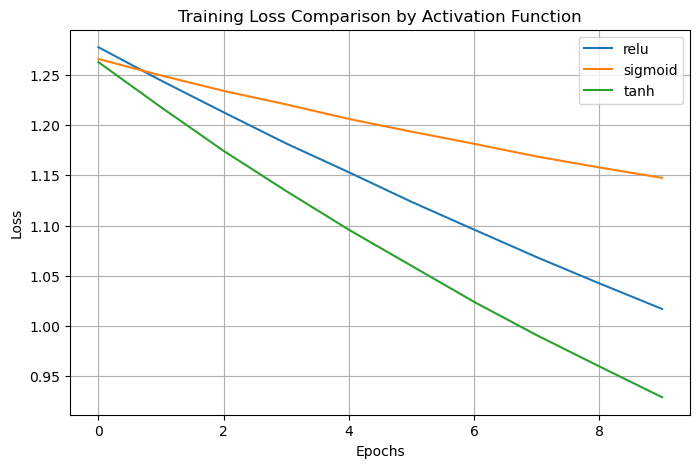

In [7]:
plt.figure(figsize=(8, 5))
for act in activations:
    plt.plot(histories[act], label=f'{act}')
plt.title("Training Loss Comparison by Activation Function")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


**Activation Function Comparison – Summary**

- **ReLU**: Typically showed the fastest convergence and lowest loss by the end of 10 epochs.
- **Tanh**: Performed moderately well, but not as fast as ReLU.
- **Sigmoid**: Slower convergence and higher loss overall, possibly due to vanishing gradients.

**Best Performer**: ReLU  
    **Why?** ReLU avoids the vanishing gradient problem and allows sparse activation, making it faster and more efficient, especially in deeper networks.
